Import Modules

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import glob
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# create new dataframe with columns 'location', 'year', 'month', 'daily rainfall total (mm)'
# 'mean temperature (°C)', 'maximum temperature (°C)', 'minimum temperature (°C)'
# 'mean wind speed (km/h)', 'max wind speed (km/h)'

In [4]:
# import all the weather data over the years 1980 to 2023 at Changi Station 
year_and_month = [''.join(i.split('-')[:2]) for i in pd.to_datetime([f'{year}' + f' 0{month}' for year in range(1980,2023) for month in range(1,13)]).astype(str)]
year_and_month.append('202301')
year_and_month.append('202302')
year_and_month = list(set(year_and_month))
urls = [f'http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_{yyyymm}.csv' for yyyymm in year_and_month]
destination_folder = '../datasets/datasets_climate_changi/'
for url in urls:
    filename = url.split('/')[-1]
    path = destination_folder + filename
    try:
        pd.read_csv(path, encoding='ANSI')
    except:
        print(url)
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        content = response.content
        with open(path, 'wb') as f:
            f.write(content)

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gp/T/ipykernel_91676/344235429.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  year_and_month = [''.join(i.split('-')[:2]) for i in pd.to_datetime([f'{year}' + f' 0{month}' for year in range(1980,2023) for month in range(1,13)]).astype(str)]


http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_200506.csv
http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_201202.csv
http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_200207.csv
http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_201102.csv
http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_198801.csv
http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_202203.csv
http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_201912.csv
http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_201101.csv
http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_201106.csv
http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_198911.csv
http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_198603.csv
http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_201301.csv
http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_199310.csv
http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_199604.csv
http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_201812

In [5]:
# create relative file path with GLOB
path = "../datasets/datasets_climate_changi/"

# save all the csv files in variable 'all_files'
# create a list of file names
all_files = glob.glob(path + "/*.csv") 

In [6]:
# there should be 518 files
len(all_files)

518

In [7]:
type(all_files[0])

str

In [8]:
# read all the csv files in all_files

# create an empty dictionary to store the DataFrames
dfs = {}

# use a for loop to read each file and store the DataFrame in the dictionary 
for i, file in enumerate(all_files): 
    df_name = f"climate_df_{i}"
    dfs[df_name] = pd.read_csv(all_files[i], encoding = "ISO-8859-1", na_values = np.nan)

In [9]:
dfs["climate_df_0"].shape

(31, 13)

In [10]:
dfs["climate_df_0"]

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,Changi,1993,8,1,0.4,,,,29.2,32.0,26.3,10.2,31.7
1,Changi,1993,8,2,0.0,,,,29.2,32.1,26.9,13.7,39.2
2,Changi,1993,8,3,0.0,,,,29.6,32.3,27.3,16.6,41.4
3,Changi,1993,8,4,0.0,,,,29.4,32.8,27.3,14.0,33.8
4,Changi,1993,8,5,0.0,,,,29.2,32.4,25.6,11.4,29.9
5,Changi,1993,8,6,0.0,,,,28.3,31.8,24.5,6.2,33.8
6,Changi,1993,8,7,0.0,,,,29.0,32.7,26.0,6.5,28.4
7,Changi,1993,8,8,0.0,,,,28.8,32.3,25.9,6.4,36.4
8,Changi,1993,8,9,0.4,,,,28.2,30.7,24.7,9.9,45.4
9,Changi,1993,8,10,0.0,,,,29.1,31.8,27.2,11.6,36.4


In [11]:
dfs["climate_df_0"].columns

Index(['Station', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)',
       'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)',
       'Highest 120 Min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)'],
      dtype='object')

In [12]:
# get unique column names from all DataFrames
cols = []
for df in dfs.values():
    cols.extend(df.columns)
cols = list(set(cols))

print(cols)

['Highest 60 min Rainfall (mm)', 'Mean Temperature (°C)', 'Daily Rainfall Total (mm)', 'Highest 120 min Rainfall (mm)', 'Highest 30 min Rainfall (mm)', 'Mean Temperature (Â°C)', 'Highest 30 Min Rainfall (mm)', 'Station', 'Max Wind Speed (km/h)', 'Maximum Temperature (°C)', 'Minimum Temperature (°C)', 'Month', 'Mean Wind Speed (km/h)', 'Day', 'Year', 'Minimum Temperature (Â°C)', 'Maximum Temperature (Â°C)', 'Highest 120 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)', 'ï»¿Station']


In [13]:
# there should only be 13 columns
# 'Station', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)',
# 'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)',
# 'Highest 120 Min Rainfall (mm)', 'Mean Temperature (°C)',
# 'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
# 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)'

# Change all column names containing 'ï»¿Station' to 'Station'
for key, df in dfs.items():
    cols_to_rename = {col: col.replace('ï»¿Station', 'Station') for col in df.columns if 'ï»¿Station' in col}
    dfs[key] = df.rename(columns=cols_to_rename)

# Change all column names containing 'Maximum Temperature (Â°C)' to 'Maximum Temperature (°C)'
for key, df in dfs.items():
    cols_to_rename = {col: col.replace('Maximum Temperature (Â°C)', 'Maximum Temperature (°C)') for col in df.columns if 'Maximum Temperature (Â°C)' in col}
    dfs[key] = df.rename(columns=cols_to_rename)
    
# Change all column names containing 'Minimum Temperature (Â°C)' to 'Minimum Temperature (°C)'
for key, df in dfs.items():
    cols_to_rename = {col: col.replace('Minimum Temperature (Â°C)', 'Minimum Temperature (°C)') for col in df.columns if 'Minimum Temperature (Â°C)' in col}
    dfs[key] = df.rename(columns=cols_to_rename)
    
# Change all column names containing 'Mean Temperature (Â°C)' to 'Mean Temperature (°C)'
for key, df in dfs.items():
    cols_to_rename = {col: col.replace('Mean Temperature (Â°C)', 'Mean Temperature (°C)') for col in df.columns if 'Mean Temperature (Â°C)' in col}
    dfs[key] = df.rename(columns=cols_to_rename)
    
# Change all column names containing 'Highest 30 min Rainfall (mm)' to 'Highest 30 Min Rainfall (mm)'
for key, df in dfs.items():
    cols_to_rename = {col: col.replace('Highest 30 min Rainfall (mm)', 'Highest 30 Min Rainfall (mm)') for col in df.columns if 'Highest 30 min Rainfall (mm)' in col}
    dfs[key] = df.rename(columns=cols_to_rename)
    
# Change all column names containing 'Highest 60 min Rainfall (mm)' to 'Highest 60 Min Rainfall (mm)'
for key, df in dfs.items():
    cols_to_rename = {col: col.replace('Highest 60 min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)') for col in df.columns if 'Highest 60 min Rainfall (mm)' in col}
    dfs[key] = df.rename(columns=cols_to_rename)
    
# Change all column names containing 'Highest 120 min Rainfall (mm)' to 'Highest 120 Min Rainfall (mm)'
for key, df in dfs.items():
    cols_to_rename = {col: col.replace('Highest 120 min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)') for col in df.columns if 'Highest 120 min Rainfall (mm)' in col}
    dfs[key] = df.rename(columns=cols_to_rename)

In [14]:
# get unique column names from all DataFrames again after aligning the names of all the columns
cols = []
for df in dfs.values():
    cols.extend(df.columns)
cols = list(set(cols))

cols

['Day',
 'Year',
 'Highest 30 Min Rainfall (mm)',
 'Station',
 'Max Wind Speed (km/h)',
 'Highest 120 Min Rainfall (mm)',
 'Mean Temperature (°C)',
 'Daily Rainfall Total (mm)',
 'Highest 60 Min Rainfall (mm)',
 'Minimum Temperature (°C)',
 'Month',
 'Maximum Temperature (°C)',
 'Mean Wind Speed (km/h)']

In [15]:
# reindex all DataFrames to align column names
for key, df in dfs.items():
    dfs[key] = df.reindex(columns=cols)

In [16]:
# concatenate the DataFrames into a single DataFrame
climate_df = pd.concat(dfs.values(), axis=0)
climate_df.shape

(15765, 13)

In [17]:
# combine the Year, Month, and Day columns into a single DateTime column
climate_df["DateTime"] = pd.to_datetime(climate_df[["Year", "Month", "Day"]], format="%Y-%m-%d")

# sort the DataFrame by the DateTime column in ascending order
# reset index and drop the previous index column
climate_df = climate_df.sort_values("DateTime").reset_index(drop=True)

# print the sorted DataFrame
print(climate_df.shape)
climate_df.head(1000)

(15765, 14)


,Day,Year,Highest 30 Min Rainfall (mm),Station,Max Wind Speed (km/h),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Daily Rainfall Total (mm),Highest 60 Min Rainfall (mm),Minimum Temperature (°C),Month,Maximum Temperature (°C),Mean Wind Speed (km/h),DateTime
0,1,1980,,Changi,,,,0.0,,,1,,,1980-01-01
1,2,1980,,Changi,,,,0.0,,,1,,,1980-01-02
2,3,1980,,Changi,,,,0.0,,,1,,,1980-01-03
3,4,1980,,Changi,,,,0.0,,,1,,,1980-01-04
4,5,1980,,Changi,,,,8.0,,,1,,,1980-01-05
5,6,1980,,Changi,,,,9.1,,,1,,,1980-01-06
6,7,1980,,Changi,,,,7.9,,,1,,,1980-01-07
7,8,1980,,Changi,,,,0.0,,,1,,,1980-01-08
8,9,1980,,Changi,,,,0.0,,,1,,,1980-01-09
9,10,1980,,Changi,,,,0.0,,,1,,,1980-01-10


In [18]:
# check for null values
climate_df.isnull().sum()

Day                              0
Year                             0
Highest 30 Min Rainfall (mm)     0
Station                          0
Max Wind Speed (km/h)            0
Highest 120 Min Rainfall (mm)    0
Mean Temperature (°C)            0
Daily Rainfall Total (mm)        0
Highest 60 Min Rainfall (mm)     0
Minimum Temperature (°C)         0
Month                            0
Maximum Temperature (°C)         0
Mean Wind Speed (km/h)           0
DateTime                         0
dtype: int64

In [19]:
# check for empty cells not represented by null value = '\x97'
climate_df['Mean Temperature (°C)'].unique()

array(['\x97', 25.3, 24.7, 25.7, 26.3, 25.8, 23.7, 24.4, 25.4, 25.6, 25.9,
       26.2, 26.1, 26.0, 26.7, 26.5, 26.4, 26.8, 26.6, 27.0, 26.9, 27.2,
       27.3, 27.5, 27.1, 27.4, 27.6, 27.7, 27.8, 28.3, 28.2, 28.0, 27.9,
       28.1, 28.9, 28.5, 28.8, 28.4, 29.3, 29.5, 29.8, 29.9, 29.6, 29.4,
       25.5, 29.0, 29.1, 28.7, 29.2, 28.6, 25.1, 24.6, 24.5, 24.3, 29.7,
       30.2, 30.4, 30.1, 30.3, 30.0, 24.0, 25.2, 25.0, 24.9, 24.2, 24.8,
       23.6, 23.0, 23.9, 23.2, 22.9, 24.1, 22.8, 23.8, 23.4, 23.1, 23.5,
       30.8, 23.3, 30.5, 30.6, 30.9, 30.7], dtype=object)

In [20]:
# Replace empty strings with null values
climate_df.replace("\x97", np.nan, inplace=True)

In [21]:
climate_df.isnull().sum()

Day                                  0
Year                                 0
Highest 30 Min Rainfall (mm)     12421
Station                              0
Max Wind Speed (km/h)             1107
Highest 120 Min Rainfall (mm)    12421
Mean Temperature (°C)              731
Daily Rainfall Total (mm)            0
Highest 60 Min Rainfall (mm)     12421
Minimum Temperature (°C)           731
Month                                0
Maximum Temperature (°C)           731
Mean Wind Speed (km/h)            1106
DateTime                             0
dtype: int64

In [22]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15765 entries, 0 to 15764
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Day                            15765 non-null  int64         
 1   Year                           15765 non-null  int64         
 2   Highest 30 Min Rainfall (mm)   3344 non-null   object        
 3   Station                        15765 non-null  object        
 4   Max Wind Speed (km/h)          14658 non-null  object        
 5   Highest 120 Min Rainfall (mm)  3344 non-null   object        
 6   Mean Temperature (°C)          15034 non-null  float64       
 7   Daily Rainfall Total (mm)      15765 non-null  float64       
 8   Highest 60 Min Rainfall (mm)   3344 non-null   object        
 9   Minimum Temperature (°C)       15034 non-null  float64       
 10  Month                          15765 non-null  int64         
 11  Maximum Tempera

In [23]:
# drop columns with a significant number of missing values
# 'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)'
climate_df.drop(['Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)'], axis='columns', inplace=True)

In [24]:
# check out unique values for 'Mean Wind Speed (km/h)' - before correction
print(climate_df['Mean Wind Speed (km/h)'].unique())
print(climate_df['Mean Wind Speed (km/h)'].nunique())

[nan 5.5 9.4 10.7 12.6 10.3 8.4 9.8 11.4 11.2 12.5 12.3 8.7 6.7 9.5 8.3
 11.8 13.3 12.7 13.8 14.8 17.8 14.2 12.2 9.2 11.3 11.1 10.9 10.8 14.6 13.0
 12.8 12.4 17.6 16.4 17.0 14.4 13.6 16.9 19.5 9.6 15.9 12.9 11.5 11.0 15.2
 15.1 16.1 15.6 15.0 16.8 16.5 14.9 17.1 16.3 13.9 13.7 10.2 17.2 4.2 2.5
 5.8 8.9 7.1 5.6 11.6 6.8 7.2 8.8 6.4 12.1 8.1 14.5 10.6 13.2 6.0 2.1 4.9
 7.6 4.8 5.4 3.5 5.9 2.9 4.1 3.3 3.1 7.3 3.6 3.8 8.6 7.4 4.3 4.4 3.4 4.6
 3.0 7.0 9.9 5.3 6.2 3.7 8.0 8.5 2.7 5.7 8.2 4.7 5.0 10.0 10.5 9.0 7.5
 11.7 15.7 6.5 6.6 11.9 10.4 3.9 9.1 15.4 17.3 14.1 12.0 5.2 5.1 6.1 4.5
 1.3 2.0 9.7 2.8 2.6 2.2 1.5 1.7 2.3 3.2 1.9 7.7 2.4 14.0 15.3 18.1 14.7
 7.9 6.9 6.3 9.3 7.8 15.8 4.0 1.2 0.8 1.6 13.1 16.0 16.2 21.0 21.2 13.4
 10.1 0.7 1.8 15.5 0.6 13.5 17.4 19.7 22.2 18.7 16.7 14.3 18.4 20.5 1.4
 17.9 18.2 16.6 1.0 20.3 0.9 18.3 1.1 21.5 19.8 18.8 18.5 17.5 0.2 18.0
 19.2 17.7 '6' '5.8' '5.4' '7.2' '8' '10.8' '7.9' '6.2' '6.3' '6.8' '8.1'
 '7' '7.5' '9.2' '9.8' '7.8' '7.6' '5.3' '7.3' '8.

In [25]:
# rectify incorrect datatype for 'Mean Wind Speed (km/h)' 
# remove spaces, non-digit characters and empty cells
for i in climate_df.index: 
    if pd.notnull(climate_df.at[i, 'Mean Wind Speed (km/h)']) and isinstance(climate_df.at[i, 'Mean Wind Speed (km/h)'], str):
        value = climate_df.at[i, 'Mean Wind Speed (km/h)'].replace(',', '').replace('-', '').replace(' ', '')
        try:
            climate_df.at[i, 'Mean Wind Speed (km/h)'] = float(value)
        except ValueError:
            climate_df.at[i, 'Mean Wind Speed (km/h)'] = np.nan

# convert the 'Mean Wind Speed (km/h)' column from object to float data type
climate_df['Mean Wind Speed (km/h)'] = climate_df['Mean Wind Speed (km/h)'].astype(float) 

In [26]:
# check out unique values for 'Mean Wind Speed (km/h)' - after correction
print(climate_df['Mean Wind Speed (km/h)'].unique())
print(climate_df['Mean Wind Speed (km/h)'].nunique())

[ nan  5.5  9.4 10.7 12.6 10.3  8.4  9.8 11.4 11.2 12.5 12.3  8.7  6.7
  9.5  8.3 11.8 13.3 12.7 13.8 14.8 17.8 14.2 12.2  9.2 11.3 11.1 10.9
 10.8 14.6 13.  12.8 12.4 17.6 16.4 17.  14.4 13.6 16.9 19.5  9.6 15.9
 12.9 11.5 11.  15.2 15.1 16.1 15.6 15.  16.8 16.5 14.9 17.1 16.3 13.9
 13.7 10.2 17.2  4.2  2.5  5.8  8.9  7.1  5.6 11.6  6.8  7.2  8.8  6.4
 12.1  8.1 14.5 10.6 13.2  6.   2.1  4.9  7.6  4.8  5.4  3.5  5.9  2.9
  4.1  3.3  3.1  7.3  3.6  3.8  8.6  7.4  4.3  4.4  3.4  4.6  3.   7.
  9.9  5.3  6.2  3.7  8.   8.5  2.7  5.7  8.2  4.7  5.  10.  10.5  9.
  7.5 11.7 15.7  6.5  6.6 11.9 10.4  3.9  9.1 15.4 17.3 14.1 12.   5.2
  5.1  6.1  4.5  1.3  2.   9.7  2.8  2.6  2.2  1.5  1.7  2.3  3.2  1.9
  7.7  2.4 14.  15.3 18.1 14.7  7.9  6.9  6.3  9.3  7.8 15.8  4.   1.2
  0.8  1.6 13.1 16.  16.2 21.  21.2 13.4 10.1  0.7  1.8 15.5  0.6 13.5
 17.4 19.7 22.2 18.7 16.7 14.3 18.4 20.5  1.4 17.9 18.2 16.6  1.  20.3
  0.9 18.3  1.1 21.5 19.8 18.8 18.5 17.5  0.2 18.  19.2 17.7 20.2 21.4
  0.4]
1

In [27]:
# check out unique values for 'Max Wind Speed (km/h)' - before correction
print(climate_df['Max Wind Speed (km/h)'].unique())
print(climate_df['Max Wind Speed (km/h)'].nunique())

[nan 29.9 43.2 42.8 42.1 34.6 32.4 38.5 40.0 35.6 48.6 52.6 47.9 41.8 46.8
 46.1 54.0 44.3 59.8 46.4 47.5 56.5 52.2 58.0 28.1 31.7 29.5 41.4 45.0
 33.5 39.2 44.6 38.9 33.8 39.6 43.6 41.0 43.9 38.2 48.2 37.1 35.3 37.8
 37.4 45.7 40.3 34.2 42.5 27.4 30.2 34.9 51.5 33.1 32.8 27.7 49.7 36.7
 36.0 28.8 40.7 27.0 23.8 55.8 47.2 57.2 28.4 31.0 75.2 51.8 31.3 50.8
 63.0 25.2 51.1 60.8 53.6 54.4 49.0 25.9 64.4 32.0 29.2 18.7 22.7 36.4
 54.7 30.6 22.0 24.5 26.6 49.3 61.9 71.6 52.9 25.6 45.4 26.3 20.2 24.8
 64.1 50.4 24.1 22.3 20.5 60.1 63.4 77.8 62.6 73.8 53.3 50.0 59.4 86.0
 66.6 65.9 55.4 20.9 23.4 19.4 56.9 63.7 73.1 56.2 19.1 23.0 61.6 67.0
 65.2 58.3 79.2 62.3 55.1 21.6 15.1 17.3 75.6 14.8 60.5 57.6 59.0 19.8
 61.2 21.2 66.2 73.4 68.4 64.8 67.7 70.2 58.7 77.4 14.4 14.0 18.4 18.0
 16.2 76.0 85.3 7.6 16.9 76.7 17.6 68.0 72.0 69.1 15.8 13.0 15.5 16.6 9.4
 '34.2' '28.1' '38.9' '25.2' '22.3' '29.2' '32' '23' '22.7' '40' '37.8'
 '41.4' '30.2' '32.4' '37.1' '34.6' '26.6' '45.7' '35.3' '26.3' '30.6

In [28]:
# rectify incorrect datatypes for 'Max Wind Speed (km/h)'
# remove spaces, non-digit characters and empty cells
for i in climate_df.index: 
    if pd.notnull(climate_df.at[i, 'Max Wind Speed (km/h)']) and isinstance(climate_df.at[i, 'Max Wind Speed (km/h)'], str):
        value = climate_df.at[i, 'Max Wind Speed (km/h)'].replace(',', '').replace('-', '').replace(' ', '')
        try:
            climate_df.at[i, 'Max Wind Speed (km/h)'] = float(value)
        except ValueError:
            climate_df.at[i, 'Max Wind Speed (km/h)'] = np.nan

# convert the 'Max Wind Speed (km/h)' column from object to float data type
climate_df['Max Wind Speed (km/h)'] = climate_df['Max Wind Speed (km/h)'].astype(float) 

In [29]:
# check out unique values for 'Max Wind Speed (km/h)' - after correction
# why aren't the 0s for whole numbers showing?
print(climate_df['Max Wind Speed (km/h)'].unique())
print(climate_df['Max Wind Speed (km/h)'].nunique())

[ nan 29.9 43.2 42.8 42.1 34.6 32.4 38.5 40.  35.6 48.6 52.6 47.9 41.8
 46.8 46.1 54.  44.3 59.8 46.4 47.5 56.5 52.2 58.  28.1 31.7 29.5 41.4
 45.  33.5 39.2 44.6 38.9 33.8 39.6 43.6 41.  43.9 38.2 48.2 37.1 35.3
 37.8 37.4 45.7 40.3 34.2 42.5 27.4 30.2 34.9 51.5 33.1 32.8 27.7 49.7
 36.7 36.  28.8 40.7 27.  23.8 55.8 47.2 57.2 28.4 31.  75.2 51.8 31.3
 50.8 63.  25.2 51.1 60.8 53.6 54.4 49.  25.9 64.4 32.  29.2 18.7 22.7
 36.4 54.7 30.6 22.  24.5 26.6 49.3 61.9 71.6 52.9 25.6 45.4 26.3 20.2
 24.8 64.1 50.4 24.1 22.3 20.5 60.1 63.4 77.8 62.6 73.8 53.3 50.  59.4
 86.  66.6 65.9 55.4 20.9 23.4 19.4 56.9 63.7 73.1 56.2 19.1 23.  61.6
 67.  65.2 58.3 79.2 62.3 55.1 21.6 15.1 17.3 75.6 14.8 60.5 57.6 59.
 19.8 61.2 21.2 66.2 73.4 68.4 64.8 67.7 70.2 58.7 77.4 14.4 14.  18.4
 18.  16.2 76.  85.3  7.6 16.9 76.7 17.6 68.  72.  69.1 15.8 13.  15.5
 16.6  9.4  4.7  7.9 90.7 79.6 70.6 37.  31.5 42.6 29.6 35.2 33.3 18.5
 27.8 22.2 46.3 53.7 44.4 51.9 57.4 55.6 20.4 16.7 35.  29.8 42.4 28.2
 22.4 2

In [30]:
climate_df.isnull().sum()

Day                             0
Year                            0
Station                         0
Max Wind Speed (km/h)        1115
Mean Temperature (°C)         731
Daily Rainfall Total (mm)       0
Minimum Temperature (°C)      731
Month                           0
Maximum Temperature (°C)      731
Mean Wind Speed (km/h)       1108
DateTime                        0
dtype: int64

In [31]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15765 entries, 0 to 15764
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Day                        15765 non-null  int64         
 1   Year                       15765 non-null  int64         
 2   Station                    15765 non-null  object        
 3   Max Wind Speed (km/h)      14650 non-null  float64       
 4   Mean Temperature (°C)      15034 non-null  float64       
 5   Daily Rainfall Total (mm)  15765 non-null  float64       
 6   Minimum Temperature (°C)   15034 non-null  float64       
 7   Month                      15765 non-null  int64         
 8   Maximum Temperature (°C)   15034 non-null  float64       
 9   Mean Wind Speed (km/h)     14657 non-null  float64       
 10  DateTime                   15765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage:

<AxesSubplot: >

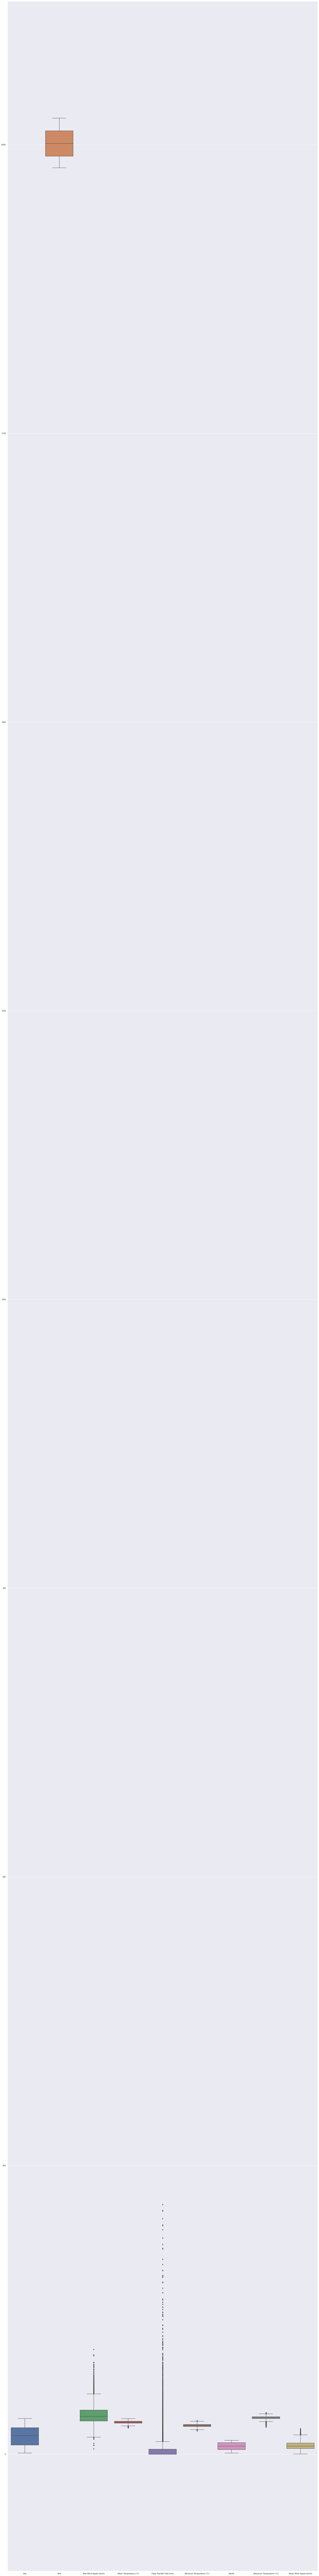

In [32]:
# replace null values with mean (normal distribution), median (skewed distribution), mode (small number of unique values)
sns.set(rc={'figure.figsize':(30,250)})
sns.boxplot(data = climate_df)

In [33]:
# perform mean imputation for normally distributed variables with missing values

# 'Mean Temperature (°C)' is evenly distributed
climate_df['Mean Temperature (°C)'].fillna(climate_df['Mean Temperature (°C)'].mean(), inplace=True)

# 'Minimum Temperature (°C)' is evenly distributed
climate_df['Minimum Temperature (°C)'].fillna(climate_df['Minimum Temperature (°C)'].mean(), inplace=True)

# 'Maximum Temperature (°C)' is just slightly skewed
climate_df['Maximum Temperature (°C)'].fillna(climate_df['Maximum Temperature (°C)'].mean(), inplace=True)

# 'Mean Wind Speed (km/h)' is just slightly skewed
climate_df['Mean Wind Speed (km/h)'].fillna(climate_df['Mean Wind Speed (km/h)'].mean(), inplace=True)

In [34]:
# perform median imputation for variables that have skewed distribution with missing values

# 'Max Wind Speed (km/h)' has a skewed distribution 
climate_df['Max Wind Speed (km/h)'].fillna(climate_df['Max Wind Speed (km/h)'].median(), inplace=True)

In [35]:
climate_df.head(1000)

,Day,Year,Station,Max Wind Speed (km/h),Mean Temperature (°C),Daily Rainfall Total (mm),Minimum Temperature (°C),Month,Maximum Temperature (°C),Mean Wind Speed (km/h),DateTime
0,1,1980,Changi,32.8,27.676001,0.0,24.924584,1,31.522349,7.534925,1980-01-01
1,2,1980,Changi,32.8,27.676001,0.0,24.924584,1,31.522349,7.534925,1980-01-02
2,3,1980,Changi,32.8,27.676001,0.0,24.924584,1,31.522349,7.534925,1980-01-03
3,4,1980,Changi,32.8,27.676001,0.0,24.924584,1,31.522349,7.534925,1980-01-04
4,5,1980,Changi,32.8,27.676001,8.0,24.924584,1,31.522349,7.534925,1980-01-05
5,6,1980,Changi,32.8,27.676001,9.1,24.924584,1,31.522349,7.534925,1980-01-06
6,7,1980,Changi,32.8,27.676001,7.9,24.924584,1,31.522349,7.534925,1980-01-07
7,8,1980,Changi,32.8,27.676001,0.0,24.924584,1,31.522349,7.534925,1980-01-08
8,9,1980,Changi,32.8,27.676001,0.0,24.924584,1,31.522349,7.534925,1980-01-09
9,10,1980,Changi,32.8,27.676001,0.0,24.924584,1,31.522349,7.534925,1980-01-10


In [36]:
# create weekly climate_df instead of daily climate_df 1980-2023

# setting "DateTIme" column as index
climate_wk = climate_df.set_index('DateTime')

# drop columns that are redundant 
climate_wk = climate_wk.drop(columns = ['Year', 'Month', 'Day', 'Station'])

display(climate_wk.tail(100))

,Max Wind Speed (km/h),Mean Temperature (°C),Daily Rainfall Total (mm),Minimum Temperature (°C),Maximum Temperature (°C),Mean Wind Speed (km/h)
DateTime,,,,,,
2022-11-21,40.7,28.6,11.0,23.2,33.1,8.9
2022-11-22,37.0,30.0,2.2,26.0,33.9,8.2
2022-11-23,46.3,27.6,3.6,24.1,30.3,6.4
2022-11-24,38.9,28.7,13.4,23.7,33.9,6.5
2022-11-25,27.8,27.8,5.2,24.5,31.3,6.3
2022-11-26,24.1,27.5,1.6,25.6,31.5,7.2
2022-11-27,42.6,26.4,1.4,24.6,28.8,5.7
2022-11-28,31.5,27.2,2.2,24.9,32.4,8.4
2022-11-29,35.2,27.6,0.0,25.1,32.0,7.4


In [37]:
# columns to be grouped by mean
col_mean = ['Mean Temperature (°C)', 'Mean Wind Speed (km/h)', 'Daily Rainfall Total (mm)']

# columns to be grouped by min/max
col_max = ['Maximum Temperature (°C)', 'Max Wind Speed (km/h)']
col_min = ['Minimum Temperature (°C)']

# define the aggregation functions
agg_functions = {col: 'mean' for col in col_mean}
agg_functions.update({col: 'max' for col in col_max})
agg_functions.update({col: 'min' for col in col_min})

# resample to weekly frequency and aggregate with mean, max and min functions
climate_wk = climate_wk.resample('W-Sun').agg(agg_functions)

display(climate_wk.tail(50))

,Mean Temperature (°C),Mean Wind Speed (km/h),Daily Rainfall Total (mm),Maximum Temperature (°C),Max Wind Speed (km/h),Minimum Temperature (°C)
DateTime,,,,,,
2022-03-27,28.500000,7.557143,7.714286,34.2,37.0,23.0
2022-04-03,28.171429,6.171429,7.114286,34.0,48.2,24.0
2022-04-10,27.342857,6.071429,3.057143,33.3,40.7,23.5
2022-04-17,28.400000,6.057143,15.028571,33.1,57.4,23.6
2022-04-24,28.371429,6.857143,7.485714,33.5,40.7,23.1
2022-05-01,28.442857,5.771429,7.000000,33.3,29.6,24.9
2022-05-08,28.700000,8.185714,1.600000,33.3,44.4,24.7
2022-05-15,29.485714,9.242857,1.628571,34.8,38.9,25.0
2022-05-22,28.942857,7.057143,4.257143,33.5,51.9,23.5


In [38]:
# save climate dataframe into csv format for merging
climate_wk.to_csv('../datasets/climate_wk.csv', index=True)